**CROP AND FERTILIZER RECOMMENDATION SYSTEM USING ML**

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
crop=pd.read_csv("/content/Crop_recommendation.csv")

In [3]:
crop.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
crop.shape

(2200, 8)

In [6]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
#To check null values
crop.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [9]:
crop.duplicated().sum()

0

In [26]:
#To check statistics of the crops
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [12]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [13]:
#check the target feature distribution
crop['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


In [14]:
pip install seaborn

### **Distribution of Soil pH**

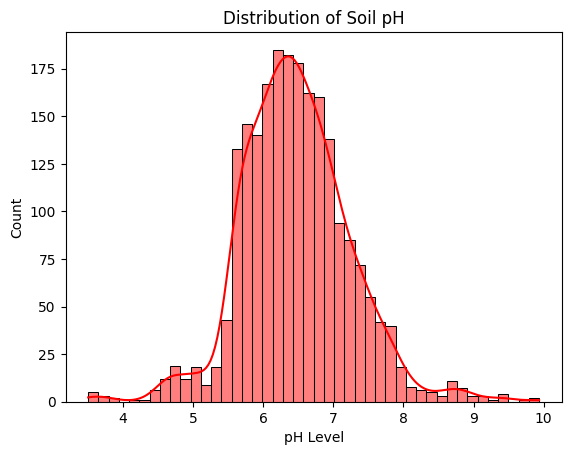

In [15]:
sns.histplot(crop['ph'], kde=True, color='red')
plt.title("Distribution of Soil pH")
plt.xlabel("pH Level")
plt.ylabel("Count")
plt.show()

### **Distribution of Rainfall**

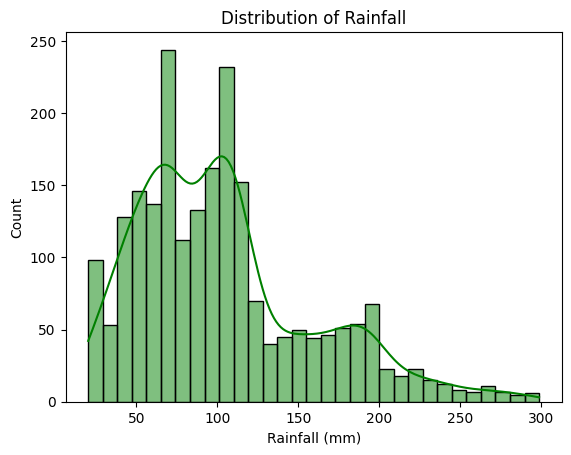

In [16]:
sns.histplot(crop['rainfall'], kde=True, color='green')
plt.title("Distribution of Rainfall")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Count")
plt.show()

### **Boxplot**

---


Understanding the suitable temperature range for crop production.The right temperature will result in good quality crop production.

<ipython-input-35-e6835dff1394>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='temperature', data=crop, palette='coolwarm')


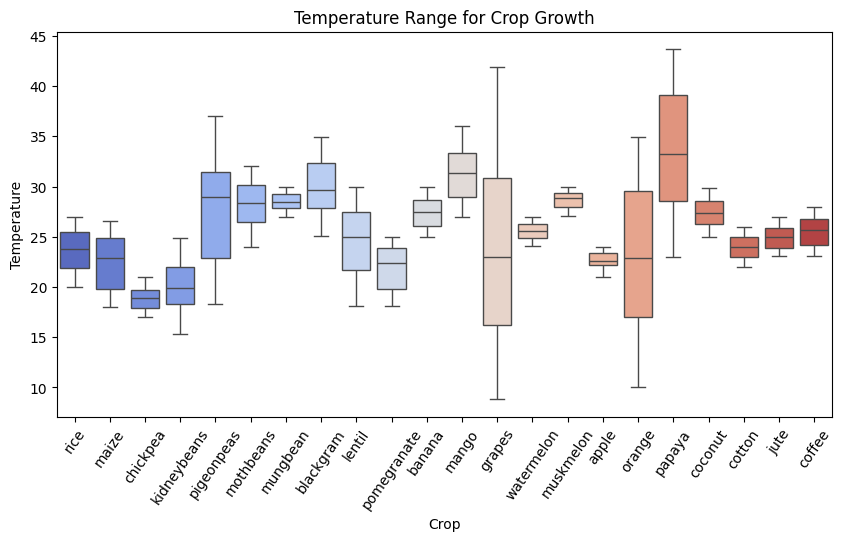

In [35]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='label', y='temperature', data=crop, palette='coolwarm')
plt.title("Temperature Range for Crop Growth")
plt.xlabel("Crop")
plt.ylabel("Temperature")
plt.xticks(rotation=55)
plt.show()

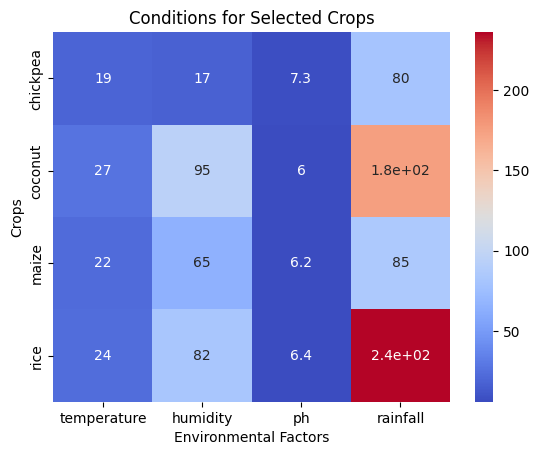

In [46]:
# Select crops of interest
crop_interest = ['rice','maize','wheat','sugarcane','coconut','chickpea']
condition = crop[crop['label'].isin(crop_interest)].groupby('label')[['temperature','humidity','ph','rainfall']].mean()
sns.heatmap(condition, annot=True, cmap='coolwarm')
plt.title("Conditions for Selected Crops")
plt.xlabel("Environmental Factors")
plt.ylabel("Crops")
plt.show()